In [1]:
import os
import pandas as pd
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4

fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Human

### Baron_human

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,library,organ,organism,platform
human1_lib1.final_cell_0001,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,lib1,Pancreas,Homo sapiens,inDrop
human1_lib1.final_cell_0002,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,lib1,Pancreas,Homo sapiens,inDrop
human1_lib1.final_cell_0003,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,lib1,Pancreas,Homo sapiens,inDrop
human1_lib1.final_cell_0004,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,lib1,Pancreas,Homo sapiens,inDrop
human1_lib1.final_cell_0005,pancreatic acinar cell,CL:0002064,acinar,Baron_human,human1,lib1,Pancreas,Homo sapiens,inDrop


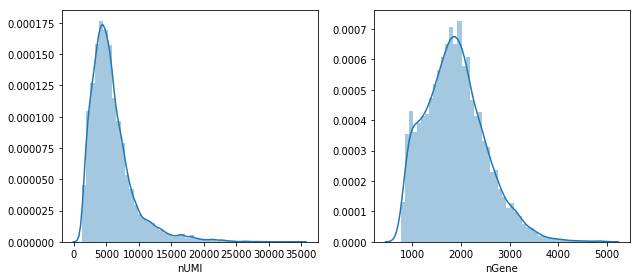

In [2]:
baron_human = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Baron_human/data.h5")
utils.peek(baron_human, "Baron_human")
baron_human = baron_human.normalize()
baron_human.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
baron_human_model = cb.directi.fit_DIRECTi(
    baron_human, baron_human.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Baron_human/model_0"
)
baron_human.latent = baron_human_model.inference(baron_human)

[DIRECTi epoch 0] train=2.451, val=2.426, time elapsed=1.9s Regular save...
[DIRECTi epoch 1] train=2.410, val=2.344, time elapsed=0.9s
[DIRECTi epoch 2] train=1.578, val=0.928, time elapsed=0.9s
[DIRECTi epoch 3] train=0.797, val=0.793, time elapsed=0.9s
[DIRECTi epoch 4] train=0.748, val=0.764, time elapsed=0.9s
[DIRECTi epoch 5] train=0.742, val=0.737, time elapsed=0.9s
[DIRECTi epoch 6] train=0.732, val=0.728, time elapsed=0.9s
[DIRECTi epoch 7] train=0.722, val=0.728, time elapsed=0.9s
[DIRECTi epoch 8] train=0.715, val=0.711, time elapsed=0.9s
[DIRECTi epoch 9] train=0.707, val=0.710, time elapsed=0.9s
[DIRECTi epoch 10] train=0.698, val=0.694, time elapsed=0.9s Regular save...
[DIRECTi epoch 11] train=0.687, val=0.686, time elapsed=0.9s
[DIRECTi epoch 12] train=0.679, val=0.677, time elapsed=0.9s
[DIRECTi epoch 13] train=0.673, val=0.674, time elapsed=0.9s
[DIRECTi epoch 14] train=0.669, val=0.670, time elapsed=0.9s
[DIRECTi epoch 15] train=0.665, val=0.666, time elapsed=0.9s
[D

[  Info   ] Computing tSNE...


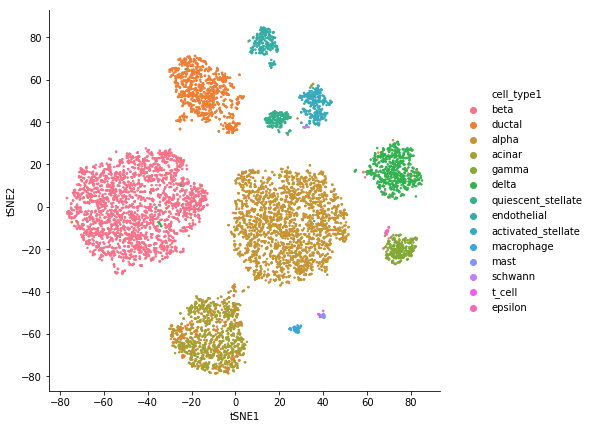

In [4]:
plot = baron_human.visualize_latent("cell_type1")
plot.get_figure().savefig("Baron_human/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


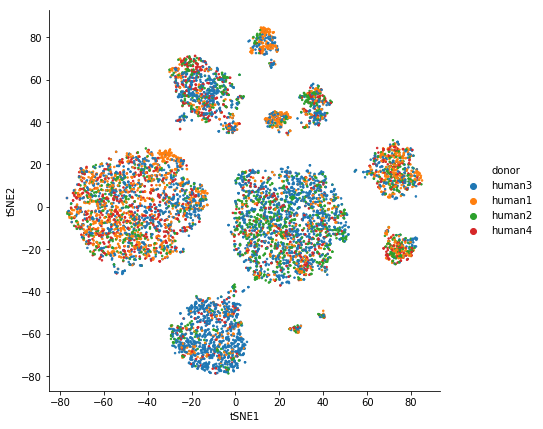

In [5]:
plot = baron_human.visualize_latent("donor")
plot.get_figure().savefig("Baron_human/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
baron_human_models = [baron_human_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    baron_human_models.append(cb.directi.fit_DIRECTi(
        baron_human, baron_human.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Baron_human/model_%d" % i
    ))
baron_human_blast = cb.blast.BLAST(baron_human_models, baron_human, keep_exprs=True).build_empirical()
baron_human_blast.save("Baron_human")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_human/model_1/checkpoint-144
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_human/model_2/checkpoint-121
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_human/model_3/checkpoint-147


In [7]:
with open("Baron_human/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Baron_human/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(baron_human_blast, "Baron_human")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9638
Accuracy = 0.9752


### Muraro

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,batch,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,organ,organism,platform
D28.1_1,1,pancreatic A cell,CL:0000171,alpha,Muraro,D28,Pancreas,Homo sapiens,CEL-Seq2
D28.1_13,1,pancreatic ductal cell,CL:0002079,ductal,Muraro,D28,Pancreas,Homo sapiens,CEL-Seq2
D28.1_15,1,pancreatic A cell,CL:0000171,alpha,Muraro,D28,Pancreas,Homo sapiens,CEL-Seq2
D28.1_17,1,pancreatic A cell,CL:0000171,alpha,Muraro,D28,Pancreas,Homo sapiens,CEL-Seq2
D28.1_2,1,endothelial cell,CL:0000115,endothelial,Muraro,D28,Pancreas,Homo sapiens,CEL-Seq2


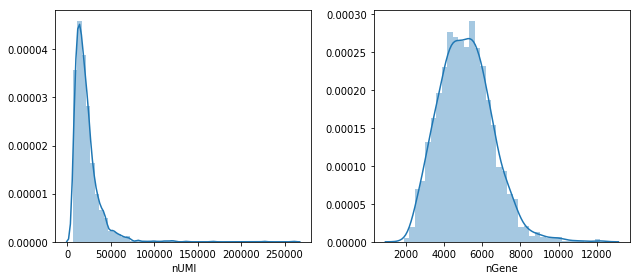

In [9]:
muraro = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Muraro/data.h5")
utils.peek(muraro, "Muraro")
muraro = muraro.normalize()
muraro.obs.head()

In [10]:
opt_model_kwargs = dict(batch_effect="donor")
muraro_model = cb.directi.fit_DIRECTi(
    muraro, muraro.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Muraro/model_0"
)
muraro.latent = muraro_model.inference(muraro)

[DIRECTi epoch 0] train=2.095, val=2.226, time elapsed=1.0s Regular save...
[DIRECTi epoch 1] train=2.093, val=2.224, time elapsed=0.2s
[DIRECTi epoch 2] train=2.091, val=2.221, time elapsed=0.2s
[DIRECTi epoch 3] train=2.087, val=2.215, time elapsed=0.2s
[DIRECTi epoch 4] train=2.079, val=2.207, time elapsed=0.2s
[DIRECTi epoch 5] train=2.072, val=2.197, time elapsed=0.2s
[DIRECTi epoch 6] train=2.060, val=2.185, time elapsed=0.2s
[DIRECTi epoch 7] train=2.050, val=2.169, time elapsed=0.2s
[DIRECTi epoch 8] train=2.028, val=2.136, time elapsed=0.2s
[DIRECTi epoch 9] train=1.925, val=1.903, time elapsed=0.2s
[DIRECTi epoch 10] train=1.591, val=1.297, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=1.168, val=1.213, time elapsed=0.2s
[DIRECTi epoch 12] train=1.020, val=1.138, time elapsed=0.2s
[DIRECTi epoch 13] train=0.967, val=1.068, time elapsed=0.2s
[DIRECTi epoch 14] train=0.952, val=1.040, time elapsed=0.2s
[DIRECTi epoch 15] train=0.939, val=1.039, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


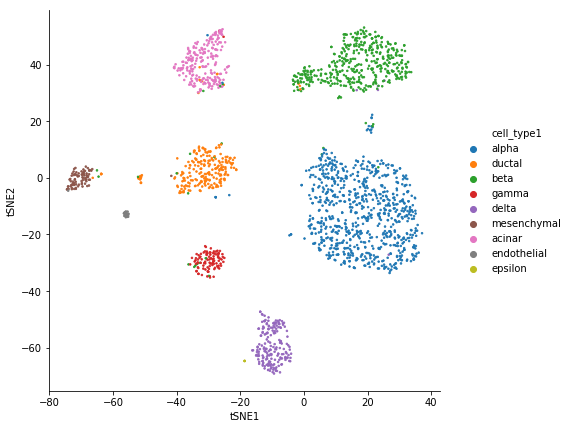

In [11]:
plot = muraro.visualize_latent("cell_type1")
plot.get_figure().savefig("Muraro/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


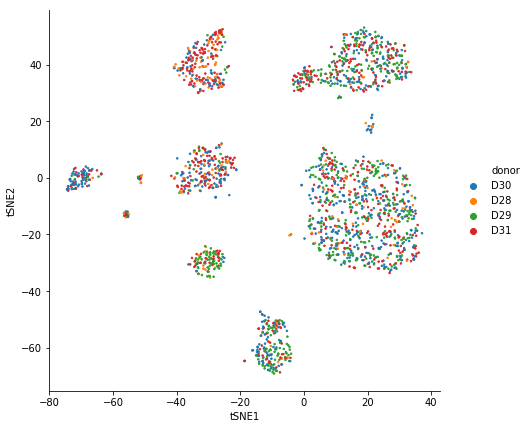

In [12]:
plot = muraro.visualize_latent("donor")
plot.get_figure().savefig("Muraro/donor.pdf", bbox_inches="tight")

In [13]:
%%capture capio
muraro_models = [muraro_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    muraro_models.append(cb.directi.fit_DIRECTi(
        muraro, muraro.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Muraro/model_%d" % i
    ))
muraro_blast = cb.blast.BLAST(muraro_models, muraro, keep_exprs=True).build_empirical()
muraro_blast.save("Muraro")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Muraro/model_1/checkpoint-329
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Muraro/model_2/checkpoint-275
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Muraro/model_3/checkpoint-334


In [14]:
with open("Muraro/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Muraro/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [15]:
utils.self_projection(muraro_blast, "Muraro")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9227
Accuracy = 0.9888


### Enge

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,gender,lifestage,organ,organism,platform
GSM2171880,pancreatic A cell,CL:0000171,alpha,Enge,donor_4,male,21.0,Pancreas,Homo sapiens,Smart-seq2
GSM2171881,pancreatic A cell,CL:0000171,alpha,Enge,donor_4,male,21.0,Pancreas,Homo sapiens,Smart-seq2
GSM2171882,pancreatic acinar cell,CL:0002064,acinar,Enge,donor_4,male,21.0,Pancreas,Homo sapiens,Smart-seq2
GSM2171883,pancreatic A cell,CL:0000171,alpha,Enge,donor_4,male,21.0,Pancreas,Homo sapiens,Smart-seq2
GSM2171884,pancreatic A cell,CL:0000171,alpha,Enge,donor_4,male,21.0,Pancreas,Homo sapiens,Smart-seq2


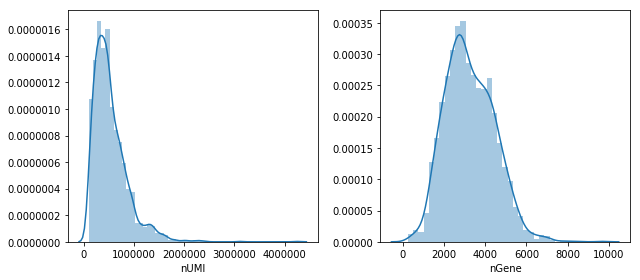

In [16]:
enge = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Enge/data.h5")
utils.peek(enge, "Enge")
enge = enge.normalize()
enge.obs.head()

In [17]:
opt_model_kwargs = dict(batch_effect="donor")
enge_model = cb.directi.fit_DIRECTi(
    enge, enge.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Enge/model_0"
)
enge.latent = enge_model.inference(enge)

[DIRECTi epoch 0] train=2.962, val=2.992, time elapsed=1.0s Regular save...
[DIRECTi epoch 1] train=2.959, val=2.988, time elapsed=0.2s
[DIRECTi epoch 2] train=2.955, val=2.981, time elapsed=0.2s
[DIRECTi epoch 3] train=2.945, val=2.970, time elapsed=0.2s
[DIRECTi epoch 4] train=2.933, val=2.955, time elapsed=0.2s
[DIRECTi epoch 5] train=2.916, val=2.934, time elapsed=0.2s
[DIRECTi epoch 6] train=2.888, val=2.900, time elapsed=0.2s
[DIRECTi epoch 7] train=2.834, val=2.800, time elapsed=0.2s
[DIRECTi epoch 8] train=2.397, val=1.849, time elapsed=0.2s
[DIRECTi epoch 9] train=1.439, val=1.411, time elapsed=0.2s
[DIRECTi epoch 10] train=1.110, val=1.373, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=1.079, val=1.345, time elapsed=0.2s
[DIRECTi epoch 12] train=1.071, val=1.274, time elapsed=0.2s
[DIRECTi epoch 13] train=1.068, val=1.227, time elapsed=0.2s
[DIRECTi epoch 14] train=1.069, val=1.155, time elapsed=0.2s
[DIRECTi epoch 15] train=1.067, val=1.132, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


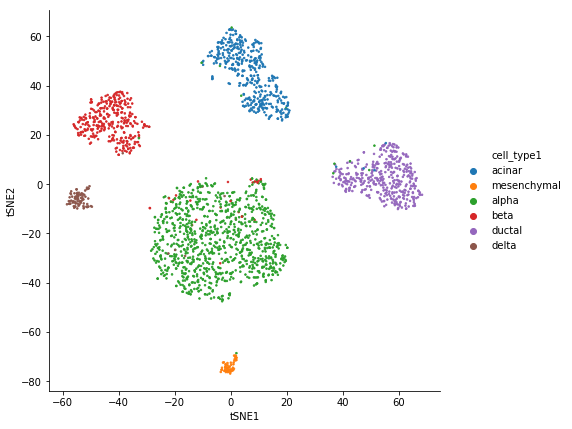

In [18]:
plot = enge.visualize_latent("cell_type1")
plot.get_figure().savefig("Enge/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


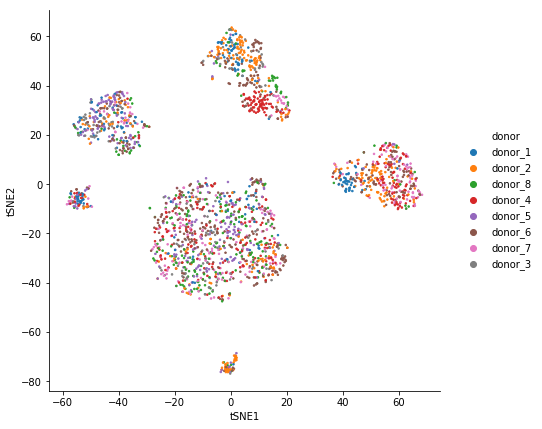

In [19]:
plot = enge.visualize_latent("donor")
plot.get_figure().savefig("Enge/donor.pdf", bbox_inches="tight")

In [20]:
%%capture capio
enge_models = [enge_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    enge_models.append(cb.directi.fit_DIRECTi(
        enge, enge.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Enge/model_%d" % i
    ))
enge_blast = cb.blast.BLAST(enge_models, enge, keep_exprs=True).build_empirical()
enge_blast.save("Enge")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Enge/model_1/checkpoint-216
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Enge/model_2/checkpoint-191
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Enge/model_3/checkpoint-206


In [21]:
with open("Enge/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Enge/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [22]:
utils.self_projection(enge_blast, "Enge")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8598
Accuracy = 0.9898


## Human aligned

In [23]:
if not os.path.exists("ALIGNED_Homo_sapiens_Pancreas"):
    os.makedirs("ALIGNED_Homo_sapiens_Pancreas")
xin = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Xin_2016/data.h5").normalize()
segerstolpe = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Segerstolpe/data.h5").normalize()
lawlor = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Lawlor/data.h5").normalize()

In [24]:
baron_human.obs["baron_human_donor"] = baron_human.obs["donor"]
muraro.obs["muraro_donor"] = muraro.obs["donor"]
enge.obs["enge_donor"] = enge.obs["donor"]

In [25]:
human = cb.data.ExprDataSet.merge_datasets(dict(
    baron_human=baron_human,
    segerstolpe=segerstolpe,
    muraro=muraro,
    xin=xin,
    lawlor=lawlor,
    enge=enge
), merge_uns_slots=["seurat_genes"])

[ Warning ] 23476 out of 43601 variables are not found, will be set to zero!
[ Warning ] 18148 out of 43601 variables are not found, will be set to zero!
[ Warning ] 24555 out of 43601 variables are not found, will be set to zero!
[ Warning ] 3750 out of 43601 variables are not found, will be set to zero!
[ Warning ] 23716 out of 43601 variables are not found, will be set to zero!
[ Warning ] 20233 out of 43601 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


In [26]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "baron_human_donor", "muraro_donor", "enge_donor"],
    rmbatch_module_kwargs=dict(lambda_reg=0.005)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
human_model = cb.directi.fit_DIRECTi(
    human, human.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Homo_sapiens_Pancreas/model_0"
)
human.latent = human_model.inference(human)

[DIRECTi epoch 0] train=1.701, val=1.690, time elapsed=3.8s Regular save...
[DIRECTi epoch 1] train=1.256, val=0.766, time elapsed=2.6s
[DIRECTi epoch 2] train=0.711, val=0.709, time elapsed=2.6s
[DIRECTi epoch 3] train=0.684, val=0.678, time elapsed=2.6s
[DIRECTi epoch 4] train=0.660, val=0.668, time elapsed=2.6s
[DIRECTi epoch 5] train=0.641, val=0.650, time elapsed=2.5s
[DIRECTi epoch 6] train=0.633, val=0.636, time elapsed=2.5s
[DIRECTi epoch 7] train=0.627, val=0.629, time elapsed=2.5s
[DIRECTi epoch 8] train=0.620, val=0.619, time elapsed=2.5s
[DIRECTi epoch 9] train=0.610, val=0.612, time elapsed=2.6s
[DIRECTi epoch 10] train=0.602, val=0.604, time elapsed=2.7s Regular save...
[DIRECTi epoch 11] train=0.597, val=0.600, time elapsed=2.6s
[DIRECTi epoch 12] train=0.594, val=0.599, time elapsed=2.6s
[DIRECTi epoch 13] train=0.591, val=0.593, time elapsed=2.5s
[DIRECTi epoch 14] train=0.588, val=0.592, time elapsed=2.5s
[DIRECTi epoch 15] train=0.586, val=0.590, time elapsed=2.5s
[D

[  Info   ] Computing tSNE...


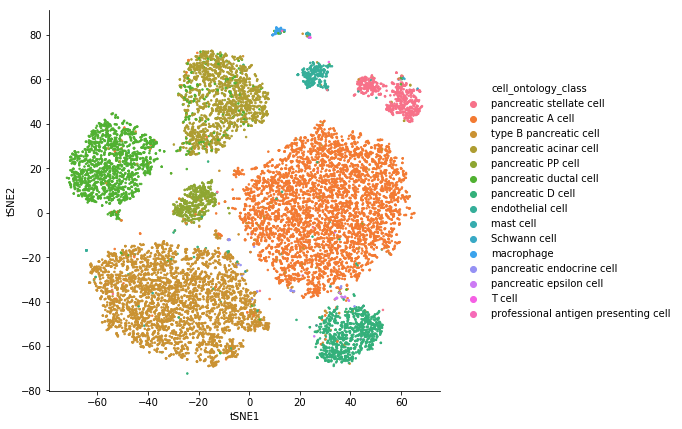

In [27]:
plot = human.visualize_latent("cell_ontology_class", reuse=False)
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Pancreas/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


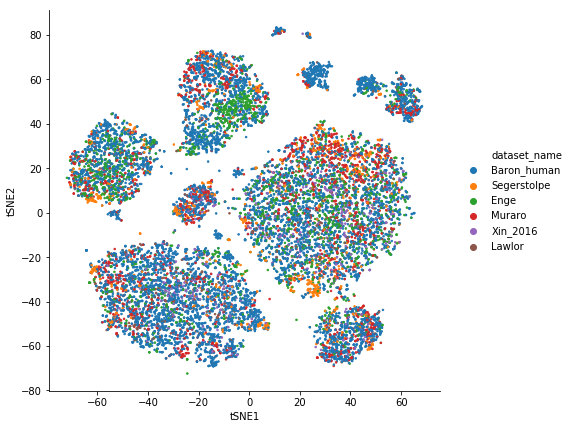

In [28]:
plot = human.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Pancreas/dataset_name.pdf", bbox_inches="tight")

In [29]:
%%capture capio
human_models = [human_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    human_models.append(cb.directi.fit_DIRECTi(
        human, human.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Homo_sapiens_Pancreas/model_%d" % i
    ))
human_blast = cb.blast.BLAST(human_models, human, keep_exprs=True).build_empirical()
human_blast.save("ALIGNED_Homo_sapiens_Pancreas")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Pancreas/model_1/checkpoint-118
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Pancreas/model_2/checkpoint-113
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Pancreas/model_3/checkpoint-100


In [30]:
with open("ALIGNED_Homo_sapiens_Pancreas/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Homo_sapiens_Pancreas/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [31]:
utils.self_projection(human_blast, "ALIGNED_Homo_sapiens_Pancreas")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9282
Accuracy = 0.9772


Slightly decrease aligning strength?

---

# Mouse

### Baron_mouse

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,library,organ,organism,platform
mouse1_lib1.final_cell_0001,type B pancreatic cell,CL:0000169,beta,Baron_mouse,mouse1,lib1,Pancreas,Mus musculus,inDrop
mouse1_lib1.final_cell_0002,pancreatic ductal cell,CL:0002079,ductal,Baron_mouse,mouse1,lib1,Pancreas,Mus musculus,inDrop
mouse1_lib1.final_cell_0003,pancreatic D cell,CL:0000173,delta,Baron_mouse,mouse1,lib1,Pancreas,Mus musculus,inDrop
mouse1_lib1.final_cell_0004,Schwann cell,CL:0002573,schwann,Baron_mouse,mouse1,lib1,Pancreas,Mus musculus,inDrop
mouse1_lib1.final_cell_0005,pancreatic D cell,CL:0000173,delta,Baron_mouse,mouse1,lib1,Pancreas,Mus musculus,inDrop


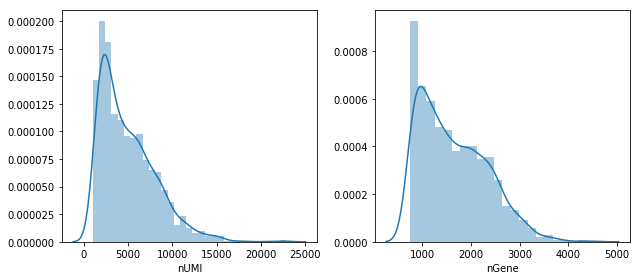

In [32]:
baron_mouse = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Baron_mouse/data.h5")
utils.peek(baron_mouse, "Baron_mouse")
baron_mouse = baron_mouse.normalize()
baron_mouse.obs.head()

In [33]:
opt_model_kwargs = dict(batch_effect="donor")
baron_mouse_model = cb.directi.fit_DIRECTi(
    baron_mouse, baron_mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Baron_mouse/model_0"
)
baron_mouse.latent = baron_mouse_model.inference(baron_mouse)

[DIRECTi epoch 0] train=2.988, val=3.014, time elapsed=1.0s Regular save...
[DIRECTi epoch 1] train=2.983, val=3.008, time elapsed=0.2s
[DIRECTi epoch 2] train=2.977, val=3.000, time elapsed=0.2s
[DIRECTi epoch 3] train=2.966, val=2.989, time elapsed=0.2s
[DIRECTi epoch 4] train=2.958, val=2.976, time elapsed=0.2s
[DIRECTi epoch 5] train=2.938, val=2.960, time elapsed=0.2s
[DIRECTi epoch 6] train=2.921, val=2.938, time elapsed=0.2s
[DIRECTi epoch 7] train=2.895, val=2.902, time elapsed=0.2s
[DIRECTi epoch 8] train=2.834, val=2.806, time elapsed=0.2s
[DIRECTi epoch 9] train=2.540, val=2.301, time elapsed=0.2s
[DIRECTi epoch 10] train=1.711, val=1.192, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=1.061, val=0.886, time elapsed=0.2s
[DIRECTi epoch 12] train=0.790, val=0.767, time elapsed=0.2s
[DIRECTi epoch 13] train=0.734, val=0.748, time elapsed=0.2s
[DIRECTi epoch 14] train=0.720, val=0.761, time elapsed=0.2s
[DIRECTi epoch 15] train=0.720, val=0.760, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


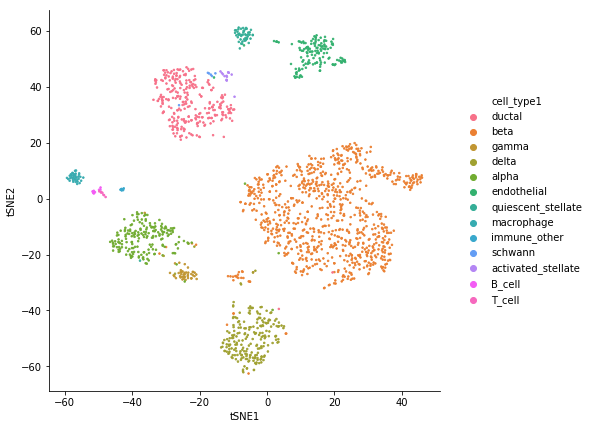

In [34]:
plot = baron_mouse.visualize_latent("cell_type1")
plot.get_figure().savefig("Baron_mouse/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


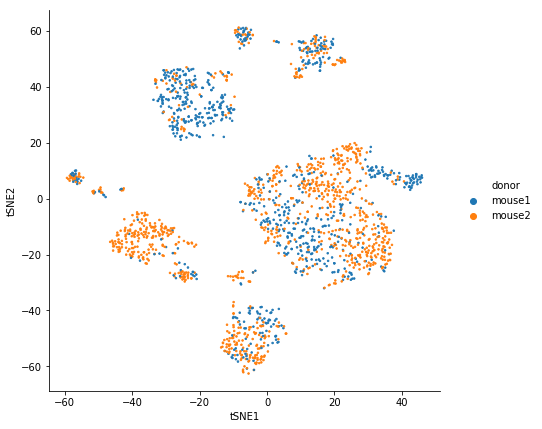

In [35]:
plot = baron_mouse.visualize_latent("donor")
plot.get_figure().savefig("Baron_mouse/donor.pdf", bbox_inches="tight")

In [36]:
%%capture capio
baron_mouse_models = [baron_mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    baron_mouse_models.append(cb.directi.fit_DIRECTi(
        baron_mouse, baron_mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Baron_mouse/model_%d" % i
    ))
baron_mouse_blast = cb.blast.BLAST(baron_mouse_models, baron_mouse, keep_exprs=True).build_empirical()
baron_mouse_blast.save("Baron_mouse")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_mouse/model_1/checkpoint-234
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_mouse/model_2/checkpoint-247
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Baron_mouse/model_3/checkpoint-202


In [37]:
with open("Baron_mouse/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Baron_mouse/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [38]:
utils.self_projection(baron_mouse_blast, "Baron_mouse")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8240
Accuracy = 0.9884


### Quake_Smart-seq2_Pancreas

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
B21.MAA000574.3_8_M.1.1,endothelial cell,CL:0000115,endothelial cell,MAA000574,7.0,Quake_Smart-seq2_Pancreas,3_8_M,endothelial cell,M,Pancreas,Mus musculus,Smart-seq2,Exocrine
B22.MAA000574.3_8_M.1.1,endothelial cell,CL:0000115,endothelial cell,MAA000574,7.0,Quake_Smart-seq2_Pancreas,3_8_M,endothelial cell,M,Pancreas,Mus musculus,Smart-seq2,Exocrine
D13.MAA000574.3_8_M.1.1,leukocyte,CL:0000738,leukocyte,MAA000574,8.0,Quake_Smart-seq2_Pancreas,3_8_M,immune cell,M,Pancreas,Mus musculus,Smart-seq2,Exocrine
D14.MAA000574.3_8_M.1.1,pancreatic acinar cell,CL:0002064,pancreatic acinar cell,MAA000574,3.0,Quake_Smart-seq2_Pancreas,3_8_M,acinar cell,M,Pancreas,Mus musculus,Smart-seq2,Exocrine
C2.MAA000574.3_8_M.1.1,type B pancreatic cell,CL:0000169,type B pancreatic cell,MAA000574,6.0,Quake_Smart-seq2_Pancreas,3_8_M,beta cell,M,Pancreas,Mus musculus,Smart-seq2,Exocrine


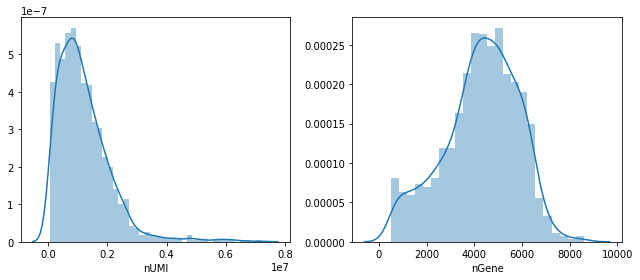

In [39]:
quake_smart_seq2_pancreas = cb.data.ExprDataSet.read_dataset(
    "../../Datasets/data/Quake_Smart-seq2_Pancreas/data.h5")
utils.peek(quake_smart_seq2_pancreas, "Quake_Smart-seq2_Pancreas")
quake_smart_seq2_pancreas = quake_smart_seq2_pancreas.normalize()
quake_smart_seq2_pancreas.obs.head()

In [40]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_pancreas_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_pancreas, quake_smart_seq2_pancreas.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Pancreas/model_0"
)
quake_smart_seq2_pancreas.latent = quake_smart_seq2_pancreas_model.inference(quake_smart_seq2_pancreas)

[DIRECTi epoch 0] train=2.853, val=2.853, time elapsed=1.1s Regular save...
[DIRECTi epoch 1] train=2.849, val=2.847, time elapsed=0.2s
[DIRECTi epoch 2] train=2.842, val=2.840, time elapsed=0.2s
[DIRECTi epoch 3] train=2.834, val=2.831, time elapsed=0.2s
[DIRECTi epoch 4] train=2.824, val=2.821, time elapsed=0.2s
[DIRECTi epoch 5] train=2.813, val=2.809, time elapsed=0.2s
[DIRECTi epoch 6] train=2.800, val=2.795, time elapsed=0.2s
[DIRECTi epoch 7] train=2.786, val=2.779, time elapsed=0.2s
[DIRECTi epoch 8] train=2.767, val=2.756, time elapsed=0.2s
[DIRECTi epoch 9] train=2.733, val=2.708, time elapsed=0.2s
[DIRECTi epoch 10] train=2.638, val=2.570, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=2.300, val=2.210, time elapsed=0.2s
[DIRECTi epoch 12] train=1.760, val=1.550, time elapsed=0.2s
[DIRECTi epoch 13] train=0.933, val=0.889, time elapsed=0.2s
[DIRECTi epoch 14] train=0.713, val=0.824, time elapsed=0.2s
[DIRECTi epoch 15] train=0.685, val=0.693, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


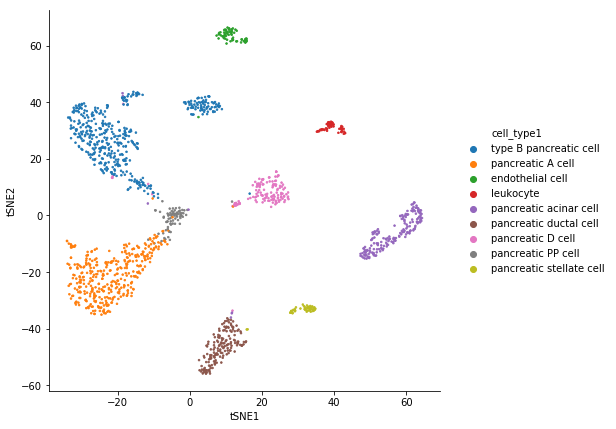

In [41]:
plot = quake_smart_seq2_pancreas.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Pancreas/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


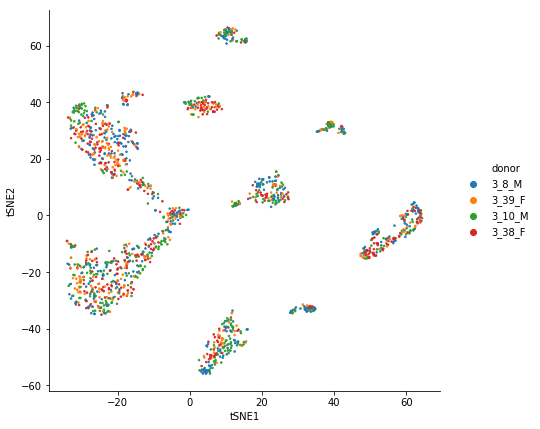

In [42]:
plot = quake_smart_seq2_pancreas.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Pancreas/donor.pdf", bbox_inches="tight")

In [43]:
%%capture capio
quake_smart_seq2_pancreas_models = [quake_smart_seq2_pancreas_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_pancreas_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_pancreas, quake_smart_seq2_pancreas.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Pancreas/model_%d" % i
    ))
quake_smart_seq2_pancreas_blast = cb.blast.BLAST(
    quake_smart_seq2_pancreas_models, quake_smart_seq2_pancreas, keep_exprs=True
).build_empirical()
quake_smart_seq2_pancreas_blast.save("Quake_Smart-seq2_Pancreas")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Pancreas/model_1/checkpoint-236
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Pancreas/model_2/checkpoint-259
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Pancreas/model_3/checkpoint-226


In [44]:
with open("Quake_Smart-seq2_Pancreas/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Pancreas/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [45]:
utils.self_projection(quake_smart_seq2_pancreas_blast, "Quake_Smart-seq2_Pancreas")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.7685
Accuracy = 0.9892


### Qiu

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,batch,cell_cycle_state,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,free_annotation,organ,organism,platform
bE17.5_1_01,β-cell E17.5-,quiescent,type B pancreatic cell,CL:0000169,beta,Qiu,"E17.5, Ins1-RFP+",Pancreas,Mus musculus,Smart-seq2
bE17.5_1_02,β-cell E17.5-,quiescent,type B pancreatic cell,CL:0000169,beta,Qiu,"E17.5, Ins1-RFP+",Pancreas,Mus musculus,Smart-seq2
bE17.5_1_03,β-cell E17.5-,quiescent,type B pancreatic cell,CL:0000169,beta,Qiu,"E17.5, Ins1-RFP+",Pancreas,Mus musculus,Smart-seq2
bE17.5_1_04,β-cell E17.5-,quiescent,type B pancreatic cell,CL:0000169,beta,Qiu,"E17.5, Ins1-RFP+",Pancreas,Mus musculus,Smart-seq2
bE17.5_1_05,β-cell E17.5-,quiescent,type B pancreatic cell,CL:0000169,beta,Qiu,"E17.5, Ins1-RFP+",Pancreas,Mus musculus,Smart-seq2


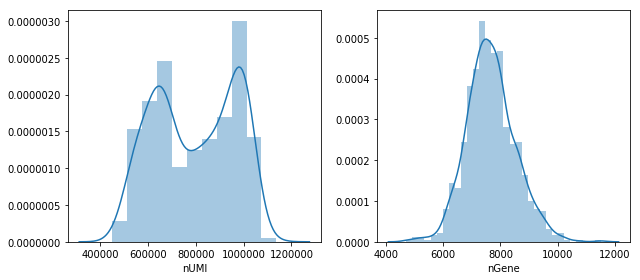

In [46]:
qiu = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Qiu/data.h5")
utils.peek(qiu, "Qiu")
qiu = qiu.normalize()
qiu.obs.head()

In [47]:
qiu_model = cb.directi.fit_DIRECTi(
    qiu, qiu.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Qiu/model_0"
)
qiu.latent = qiu_model.inference(qiu)

[DIRECTi epoch 0] train=3.126, val=3.263, time elapsed=0.7s Best save...
[DIRECTi epoch 1] train=3.120, val=3.261, time elapsed=0.1s Best save...
[DIRECTi epoch 2] train=3.124, val=3.258, time elapsed=0.1s Best save...
[DIRECTi epoch 3] train=3.120, val=3.254, time elapsed=0.1s Best save...
[DIRECTi epoch 4] train=3.116, val=3.249, time elapsed=0.1s Best save...
[DIRECTi epoch 5] train=3.105, val=3.244, time elapsed=0.1s Best save...
[DIRECTi epoch 6] train=3.102, val=3.238, time elapsed=0.1s Best save...
[DIRECTi epoch 7] train=3.099, val=3.231, time elapsed=0.1s Best save...
[DIRECTi epoch 8] train=3.093, val=3.224, time elapsed=0.1s Best save...
[DIRECTi epoch 9] train=3.086, val=3.217, time elapsed=0.1s Best save...
[DIRECTi epoch 10] train=3.080, val=3.209, time elapsed=0.1s Best save...
[DIRECTi epoch 11] train=3.068, val=3.201, time elapsed=0.1s Best save...
[DIRECTi epoch 12] train=3.060, val=3.192, time elapsed=0.1s Best save...
[DIRECTi epoch 13] train=3.056, val=3.183, time 

[  Info   ] Computing tSNE...


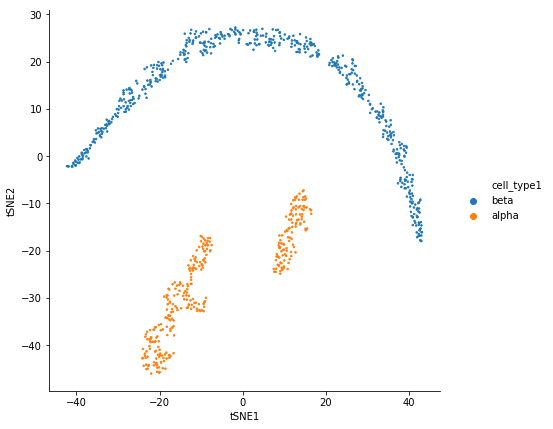

In [48]:
plot = qiu.visualize_latent("cell_type1")
plot.get_figure().savefig("Qiu/cell_type1.pdf", bbox_inches="tight")

In [49]:
%%capture capio
qiu_models = [qiu_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    qiu_models.append(cb.directi.fit_DIRECTi(
        qiu, qiu.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Qiu/model_%d" % i
    ))
qiu_blast = cb.blast.BLAST(qiu_models, qiu, keep_exprs=True).build_empirical()
qiu_blast.save("Qiu")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Qiu/model_1/checkpoint-27
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Qiu/model_2/checkpoint-31
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Qiu/model_3/checkpoint-25


In [50]:
with open("Qiu/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Qiu/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [51]:
utils.self_projection(qiu_blast, "Qiu")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8737
Accuracy = 1.0000


## Mouse aligned

In [52]:
if not os.path.exists("ALIGNED_Mus_musculus_Pancreas"):
    os.makedirs("ALIGNED_Mus_musculus_Pancreas")
baron_mouse.obs["baron_mouse_donor"] = baron_mouse.obs["donor"]
quake_smart_seq2_pancreas.obs["quake_smart_seq2_pancreas_donor"] = quake_smart_seq2_pancreas.obs["donor"]

In [53]:
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    baron_mouse=baron_mouse, quake_smart_seq2_pancreas=quake_smart_seq2_pancreas, qiu=qiu
), merge_uns_slots=["seurat_genes"])

[ Warning ] 28918 out of 43795 variables are not found, will be set to zero!
[ Warning ] 20454 out of 43795 variables are not found, will be set to zero!
[ Warning ] 3059 out of 43795 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


In [54]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "baron_mouse_donor", "quake_smart_seq2_pancreas_donor"]
)
mouse_model = cb.directi.fit_DIRECTi(
    mouse, baron_mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Pancreas/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=3.052, val=3.095, time elapsed=1.6s Regular save...
[DIRECTi epoch 1] train=3.032, val=3.067, time elapsed=0.5s
[DIRECTi epoch 2] train=2.995, val=3.022, time elapsed=0.6s
[DIRECTi epoch 3] train=2.908, val=2.803, time elapsed=0.6s
[DIRECTi epoch 4] train=1.806, val=0.986, time elapsed=0.6s
[DIRECTi epoch 5] train=0.752, val=0.722, time elapsed=0.6s
[DIRECTi epoch 6] train=0.666, val=0.675, time elapsed=0.6s
[DIRECTi epoch 7] train=0.660, val=0.677, time elapsed=0.6s
[DIRECTi epoch 8] train=0.653, val=0.664, time elapsed=0.6s
[DIRECTi epoch 9] train=0.644, val=0.672, time elapsed=0.6s
[DIRECTi epoch 10] train=0.621, val=0.617, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=0.604, val=0.618, time elapsed=0.6s
[DIRECTi epoch 12] train=0.593, val=0.606, time elapsed=0.6s
[DIRECTi epoch 13] train=0.585, val=0.607, time elapsed=0.6s
[DIRECTi epoch 14] train=0.579, val=0.583, time elapsed=0.6s
[DIRECTi epoch 15] train=0.574, val=0.576, time elapsed=0.6s
[D

[  Info   ] Computing tSNE...


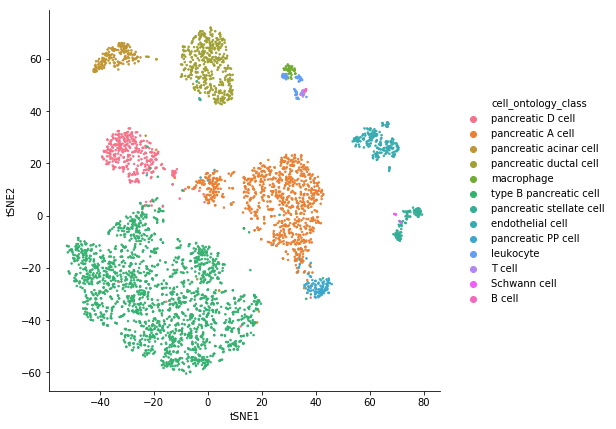

In [55]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Pancreas/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


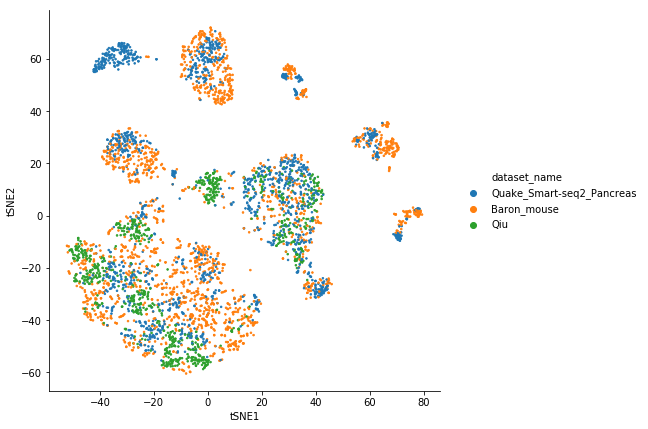

In [56]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Pancreas/dataset_name.pdf", bbox_inches="tight")

In [57]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Pancreas/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Pancreas")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Pancreas/model_1/checkpoint-127
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Pancreas/model_2/checkpoint-171
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Pancreas/model_3/checkpoint-170


In [58]:
with open("ALIGNED_Mus_musculus_Pancreas/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Pancreas/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [59]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Pancreas")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.7270
Accuracy = 0.9924


---

# Zebrafish

### Singh

/home/caozj/Software/anaconda2/envs/tf1.8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,lifestage,organ,organism,platform
X1mpf_1,type B pancreatic cell,CL:0000169,beta,Singh,X1mpf,Pancreas,Danio rerio,Smart-seq2
X1mpf_2,type B pancreatic cell,CL:0000169,beta,Singh,X1mpf,Pancreas,Danio rerio,Smart-seq2
X1mpf_3,type B pancreatic cell,CL:0000169,beta,Singh,X1mpf,Pancreas,Danio rerio,Smart-seq2
X1mpf_4,type B pancreatic cell,CL:0000169,beta,Singh,X1mpf,Pancreas,Danio rerio,Smart-seq2
X1mpf_5,type B pancreatic cell,CL:0000169,beta,Singh,X1mpf,Pancreas,Danio rerio,Smart-seq2


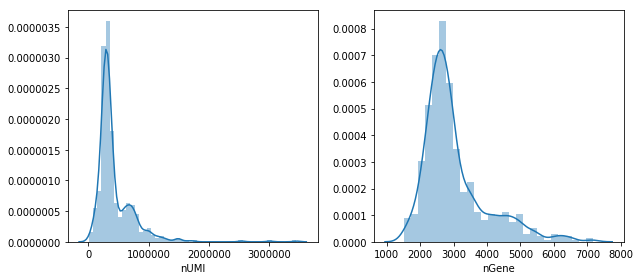

In [60]:
singh = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Singh/data.h5")
utils.peek(singh, "Singh")
singh = singh.normalize()
singh.obs.head()

In [61]:
opt_model_kwargs = dict(h_dim=64, batch_size=64)
singh_model = cb.directi.fit_DIRECTi(
    singh, singh.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Singh/model_0"
)
singh.latent = singh_model.inference(singh)

[DIRECTi epoch 0] train=2.020, val=2.257, time elapsed=0.7s Best save...
[DIRECTi epoch 1] train=2.028, val=2.257, time elapsed=0.1s Best save...
[DIRECTi epoch 2] train=2.030, val=2.256, time elapsed=0.1s Best save...
[DIRECTi epoch 3] train=2.031, val=2.254, time elapsed=0.1s Best save...
[DIRECTi epoch 4] train=2.016, val=2.252, time elapsed=0.1s Best save...
[DIRECTi epoch 5] train=2.015, val=2.250, time elapsed=0.1s Best save...
[DIRECTi epoch 6] train=2.016, val=2.246, time elapsed=0.1s Best save...
[DIRECTi epoch 7] train=2.012, val=2.242, time elapsed=0.1s Best save...
[DIRECTi epoch 8] train=2.006, val=2.237, time elapsed=0.1s Best save...
[DIRECTi epoch 9] train=2.015, val=2.231, time elapsed=0.1s Best save...
[DIRECTi epoch 10] train=2.000, val=2.225, time elapsed=0.1s Best save...
[DIRECTi epoch 11] train=1.996, val=2.217, time elapsed=0.1s Best save...
[DIRECTi epoch 12] train=1.980, val=2.209, time elapsed=0.1s Best save...
[DIRECTi epoch 13] train=1.974, val=2.199, time 

[  Info   ] Computing tSNE...


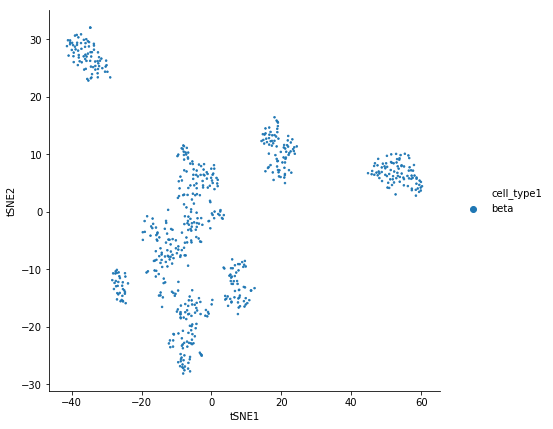

In [62]:
plot = singh.visualize_latent("cell_type1")
plot.get_figure().savefig("Singh/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


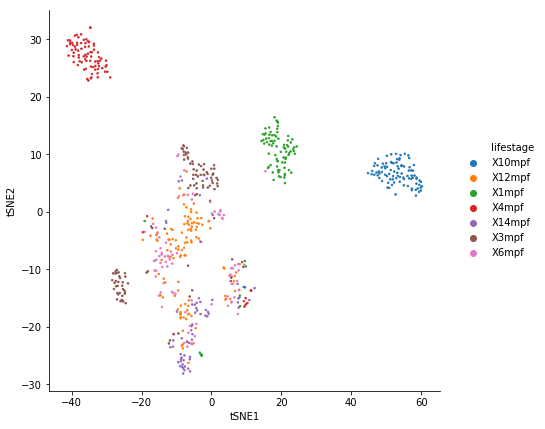

In [63]:
plot = singh.visualize_latent("lifestage")
plot.get_figure().savefig("Singh/lifestage.pdf", bbox_inches="tight")

In [64]:
%%capture capio
singh_models = [singh_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    singh_models.append(cb.directi.fit_DIRECTi(
        singh, singh.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Singh/model_%d" % i
    ))
singh_blast = cb.blast.BLAST(singh_models, singh, keep_exprs=True).build_empirical()
singh_blast.save("Singh")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Singh/model_1/checkpoint-79
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Singh/model_2/checkpoint-39
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Singh/model_3/checkpoint-43


In [65]:
with open("Singh/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Singh/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [66]:
utils.self_projection(singh_blast, "Singh")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.6358
Accuracy = 1.0000
